 # Drug Classification

### About Dataset
#### Context

Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.

#### Content

The target feature is

Drug type
#### The feature sets are:

Age
Sex
Blood Pressure Levels (BP)
Cholesterol Levels
Na to Potassium Ration
#### Inspiration

The main problem here in not just the feature sets and target sets but also the approach that is taken in solving these types of problems as a beginner. So best of luck.

https://www.kaggle.com/datasets/prathamtripathi/drug-classification

 ## 1. Data upload and first study

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import numpy as np
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import torch
import torch.nn as nn

In [53]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Drug_Classification/drug200.csv.xls')

In [54]:
# First study
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


None

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [55]:
# Check duplicates
df.duplicated().sum()

0

In [56]:
# Check other duplicate
object_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in ['DateCrawled', 'DateCreated', 'LastSeen']]



for col in object_columns:
    print(df[col].value_counts())
    print()

Sex
M    104
F     96
Name: count, dtype: int64

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64



In [57]:
# to low
df.columns = df.columns.str.lower()

 ## 2. Analysis of data

In [59]:
df.columns

Index(['age', 'sex', 'bp', 'cholesterol', 'na_to_k', 'drug'], dtype='object')

In [60]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['age', 'sex', 'bp', 'cholesterol', 'na_to_k', 'drug']] # choice all features
num_cols = 2 # Amount of columns
num_rows = (len(df_describe.columns) + num_cols - 1) // num_cols # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

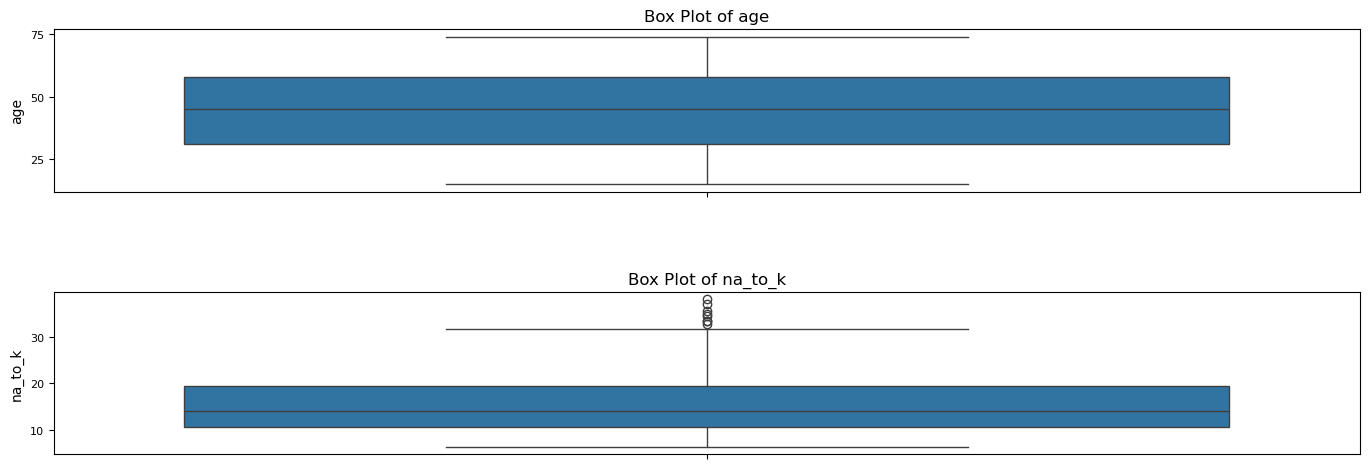

In [62]:
# Создание боксплотов для каждой числовой характеристики
numerical_features = df.select_dtypes(include=['number'])

# Определяем размер фигуры один раз
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Создаем подграфики для каждого числового признака
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Создаем подграфик
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Размер шрифта заголовка
    plt.ylabel(feature, fontsize=10)  # Размер шрифта метки оси Y
    plt.xlabel('')  # Убираем метку оси X, если она не нужна
    
    # Увеличиваем размер шрифта меток на осях
    plt.xticks(fontsize=8)  # Размер шрифта меток на оси X
    plt.yticks(fontsize=8)  # Размер шрифта меток на оси Y

plt.tight_layout()  # Автоматически подгоняет подграфики
plt.show()

 #### Build a matrix of dependences for target

interval columns not set, guessing: ['age', 'na_to_k']


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_3905/3291478919.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


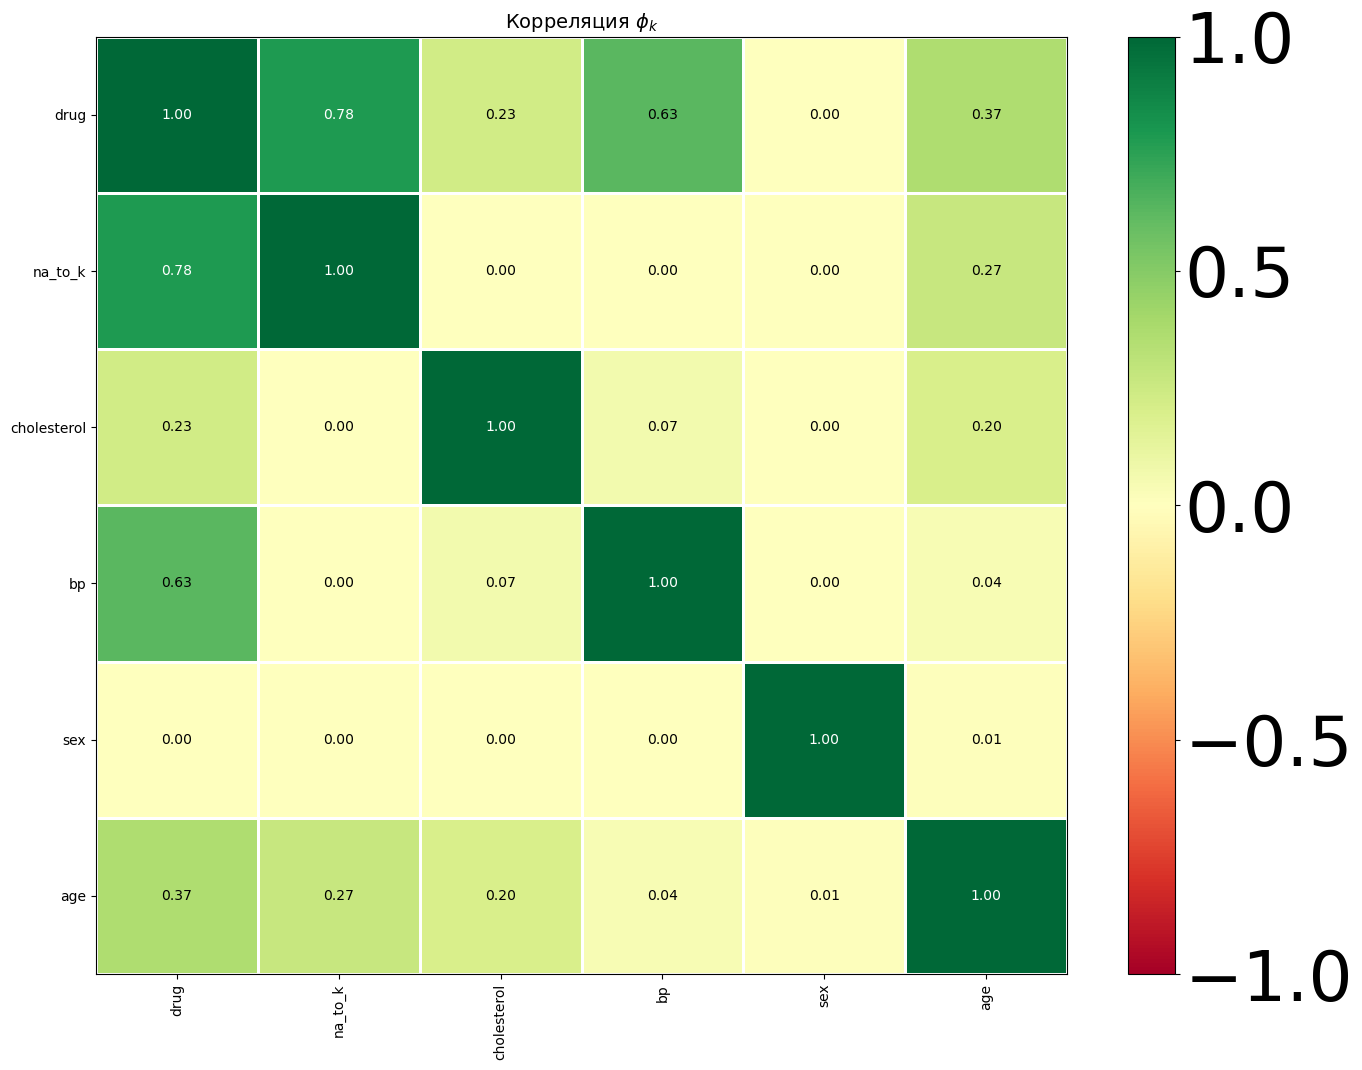

In [64]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(15, 12)
)


 ## Data preparation

 ### Prepare numerical and categorial columns

In [67]:
# Select a features and target
features = df.drop(['drug'], axis=1)
target = df['drug']

features = pd.get_dummies(features, drop_first=True)

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(features, target)


# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data drug
drugX    77
drugC    76
drugB    72
DrugY    71
drugA    68
Name: count, dtype: int64

Test data drug
drugA    23
DrugY    20
drugB    19
drugC    15
drugX    14
Name: count, dtype: int64


 #### Write the function for metrics

In [104]:
def metrics(predictions, target, probabilities):
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions, average='macro')
    recall = recall_score(target, predictions, average='macro')
    f1 = f1_score(target, predictions, average='macro')
    roc = roc_auc_score(target, probabilities, multi_class='ovr', average='macro')
    return {'accuracy': accuracy, 'precision': precision, 'recal': recall, 'f1': f1, 'roc': roc}

 #### Train LogisticRegression model 

In [109]:
max_iter = [50, 100, 150]                      
solvers = ['liblinear', 'newton-cg', 'lbfgs'] 
best_result = 0
logistic_regres, best_iter, best_solver = None, None, None

for iter in max_iter:
    for solver in solvers:
        model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=iter, solver=solver)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions, average='macro')
        if result > best_result:
            probabilities = model.predict_proba(features_test)
            logistic_regres = metrics(predictions, target_test, probabilities)
            best_iter = iter
            best_solver = solver


print(f'The best parameters: max_iter={best_iter}, solver={best_solver}')
print('Test data', logistic_regres)

The best parameters: max_iter=150, solver=lbfgs
Test data {'accuracy': 1.0, 'precision': 1.0, 'recal': 1.0, 'f1': 1.0, 'roc': 1.0}


 #### Train DecisionTree Model

In [114]:
best_result = 0
best_depth = 0
dec_tree = None
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = recall_score(target_test, predictions, average='macro')
    #print(depth, result)
    if best_result < result:
        probabilities = model.predict_proba(features_test)
        dec_tree = metrics(predictions, target_test, probabilities)
        best_depth = depth
        best_result = result

print(f'The best parameters: depth={best_depth}')
print('Test data', dec_tree)

The best parameters: depth=4
Test data {'accuracy': 1.0, 'precision': 1.0, 'recal': 1.0, 'f1': 1.0, 'roc': 1.0}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 #### Train Randomforest Model

In [119]:
best_result, best_depth, best_est = 0, 0, 0
rand_forest = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions, average='macro')
        if best_result < result:
            probabilities = model.predict_proba(features_test)
            rand_forest = metrics(predictions, target_test, probabilities)
            best_depth = depth
            best_est = est
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', rand_forest)

The best parameters: depth=3, est=10
Test data {'accuracy': 1.0, 'precision': 1.0, 'recal': 1.0, 'f1': 1.0, 'roc': 1.0}


 ## Conclusion

In [122]:
# Build a table for total

model_metrics = [logistic_regres, dec_tree, rand_forest]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest'])
print(total.sort_values(by='accuracy', ascending=False))

                    accuracy  precision  recal   f1  roc
LogisticRegression       1.0        1.0    1.0  1.0  1.0
DecisionTree             1.0        1.0    1.0  1.0  1.0
RandomForest             1.0        1.0    1.0  1.0  1.0
